In [1]:
# Mounting our drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Datasets for classification
path = '/drive/My Drive/Colab Notebooks/260323 ANN/wifi.csv'
wifi = pd.read_csv(path)
wifi

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [5]:
wifi.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [6]:
wifi.shape

(2000, 8)

In [7]:
wifi.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [8]:
# One hot encoding for target variables
room_dummies = pd.get_dummies(wifi['Room'])
room_dummies

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [9]:
# Extract feature and target variables
X = wifi.drop('Room', axis =1)
Y = room_dummies

In [10]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state =0)

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

X_train shape (1600, 7)
y_train shape (1600, 4)
X_test shape (400, 7)
y_test shape (400, 4)


In [11]:
Y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [12]:
# Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Building the sequential model

L1=100
L2=100
L3=100

model = Sequential()
model.add(Dense(L1, input_dim=7, activation='relu')) #for first hidden layer
model.add(Dense(L2, activation='relu')) #for second hidden layer
model.add(Dense(L3, activation='relu'))

# output later
model.add(Dense(4,activation='softmax')) # for multi class classification

In [22]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
from sklearn.utils import validation
# training the model for 25 epochs
history = model.fit(X_train, Y_train, epochs=25, batch_size=100,
                    validation_data=(X_test, Y_test))

Epoch 1/25
16/16 [==============================] - 1s 18ms/step - loss: 0.9302 - accuracy: 0.7500 - val_loss: 0.5677 - val_accuracy: 0.8275
Epoch 2/25
16/16 [==============================] - 0s 6ms/step - loss: 0.3551 - accuracy: 0.9050 - val_loss: 0.2336 - val_accuracy: 0.9375
Epoch 3/25
16/16 [==============================] - 0s 7ms/step - loss: 0.1546 - accuracy: 0.9656 - val_loss: 0.1332 - val_accuracy: 0.9625
Epoch 4/25
16/16 [==============================] - 0s 7ms/step - loss: 0.0970 - accuracy: 0.9700 - val_loss: 0.1006 - val_accuracy: 0.9625
Epoch 5/25
16/16 [==============================] - 0s 7ms/step - loss: 0.0821 - accuracy: 0.9737 - val_loss: 0.0940 - val_accuracy: 0.9700
Epoch 6/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.0815 - val_accuracy: 0.9750
Epoch 7/25
16/16 [==============================] - 0s 7ms/step - loss: 0.0678 - accuracy: 0.9756 - val_loss: 0.0718 - val_accuracy: 0.9750
Epoch 8/25
16/16 [=

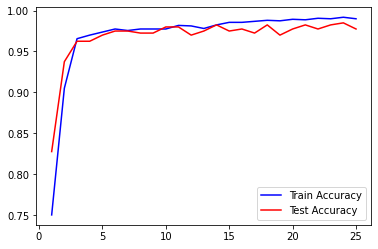

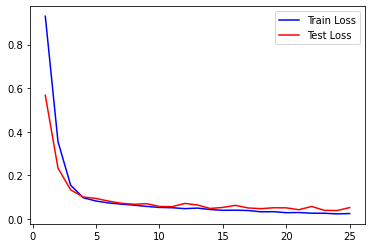

In [24]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()